In [121]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker

In [64]:
#setup youtube api and the youtube channels I'll be looking at

api_key = 'xyz'

channel_ids = ['UCKf0UqBiCQI4Ol0To9V0pKQ', ##buff dudes
               'UCYlG9AHZStenkJgXLj6w61A', ##calum von moger
               'UCaHx0T1LWrVKWF1XfWWLSuw', ##omar isuf
               'UC7aE5B-ZFEAoumyj6FaJ7lg', ##bradley martyn
               'UC3kbAe8BguiZFnsVYY1oW0w', ##steve cook
               'UCtBw4N4-EiaAqK9TvZGlGDw', ##kinobody
               'UCg_tz2iw7_-gf2xIL-DdM2g', ##kali muscle
               'UCEtMRF1ywKMc4sf3EXYyDzw'  ##scott herman
              ]

youtube = build ('youtube', 'v3', developerKey = api_key)

## Function to get channel statistics

In [65]:
def get_channel_stats(youtube, channel_ids):
    all_data = []
    request = youtube.channels().list(
                part='snippet, contentDetails,statistics',
                id= ','.join(channel_ids))
    response = request.execute()

    for i in range(len(response['items'])):
        data = dict(Channel_name=response['items'][i]['snippet']['title'],
            Channel_start_date=response['items'][i]['snippet']['publishedAt'],
            Channel_id = response['items'][i]['id'],
            Subscribers =response['items'][i]['statistics']['subscriberCount'],
            Views =response['items'][i]['statistics']['viewCount'],
            Total_videos =response['items'][i]['statistics']['videoCount'],
            playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        all_data.append(data)
        
    return all_data

In [66]:
channel_statistics = get_channel_stats(youtube, channel_ids)

In [67]:
channel_data = pd.DataFrame(channel_statistics)

In [68]:
channel_data

,Channel_name,Channel_start_date,Channel_id,Subscribers,Views,Total_videos,playlist_id
0,Steve Cook,2012-12-13T02:24:01Z,UC3kbAe8BguiZFnsVYY1oW0w,1270000,196830680,955,UU3kbAe8BguiZFnsVYY1oW0w
1,Kali Muscle,2008-04-10T20:17:38Z,UCg_tz2iw7_-gf2xIL-DdM2g,3880000,1058977985,2753,UUg_tz2iw7_-gf2xIL-DdM2g
2,ScottHermanFitness,2009-05-25T21:31:17Z,UCEtMRF1ywKMc4sf3EXYyDzw,2820000,673778453,1885,UUEtMRF1ywKMc4sf3EXYyDzw
3,Buff Dudes,2012-05-08T20:36:19Z,UCKf0UqBiCQI4Ol0To9V0pKQ,2710000,532693475,756,UUKf0UqBiCQI4Ol0To9V0pKQ
4,Kinobody,2006-06-10T00:02:21Z,UCtBw4N4-EiaAqK9TvZGlGDw,748000,255993437,1591,UUtBw4N4-EiaAqK9TvZGlGDw
5,OmarIsuf,2009-04-12T12:36:48Z,UCaHx0T1LWrVKWF1XfWWLSuw,840000,199463046,1510,UUaHx0T1LWrVKWF1XfWWLSuw
6,Calum von Moger,2012-04-17T07:59:25Z,UCYlG9AHZStenkJgXLj6w61A,914000,150143268,539,UUYlG9AHZStenkJgXLj6w61A
7,Bradley Martyn,2014-08-20T07:26:49Z,UC7aE5B-ZFEAoumyj6FaJ7lg,3220000,708385578,2296,UU7aE5B-ZFEAoumyj6FaJ7lg


In [69]:
channel_data['Subscribers'] = pd.to_numeric(channel_data['Subscribers'])
channel_data['Views'] = pd.to_numeric(channel_data['Views'])
channel_data['Total_videos'] = pd.to_numeric(channel_data['Total_videos'])
channel_data['Channel_start_date'] = pd.to_datetime(channel_data['Channel_start_date']).dt.date
channel_data.dtypes

Channel_name          object
Channel_start_date    object
Channel_id            object
Subscribers            int64
Views                  int64
Total_videos           int64
playlist_id           object
dtype: object

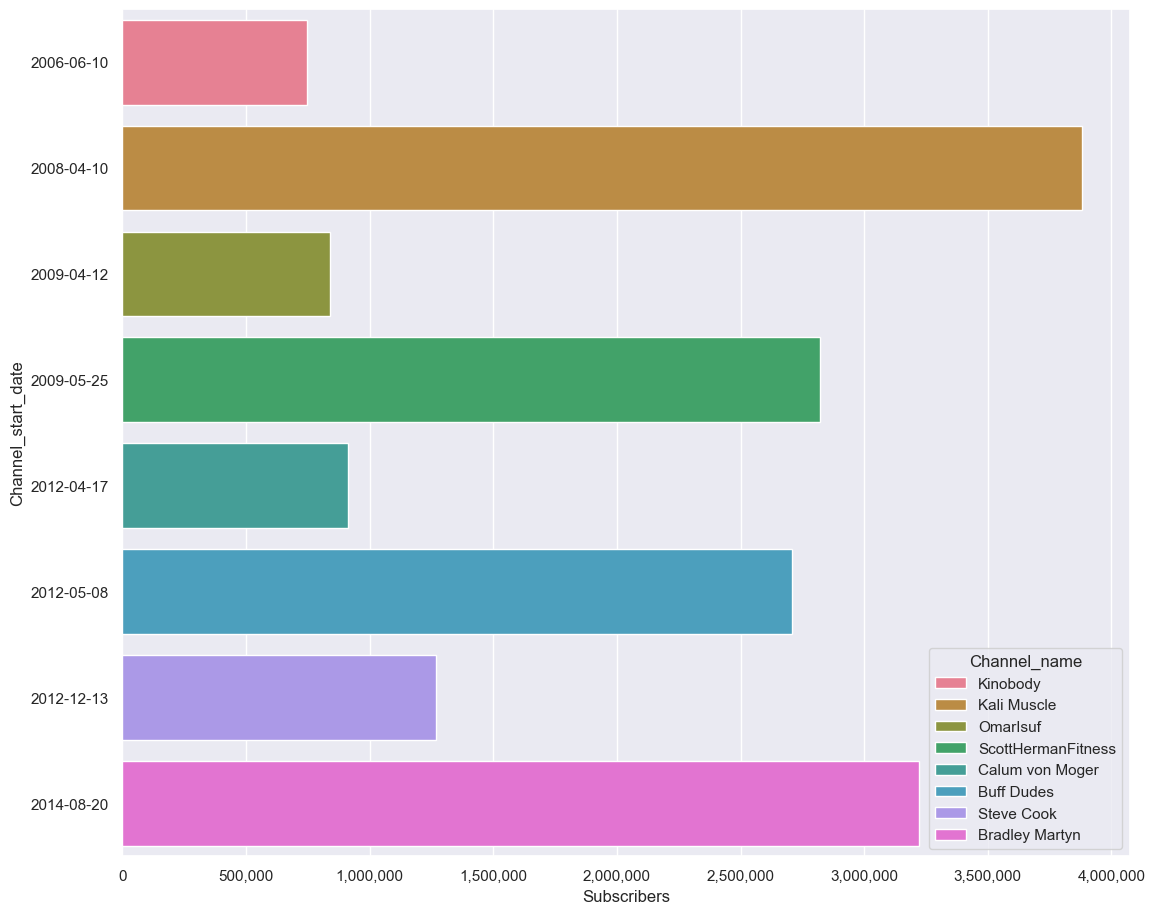

In [122]:
channel_data = channel_data.sort_values('Channel_start_date')
sns.set(rc={'figure.figsize':(13,11)})
sns.set_palette("husl")
ax = sns.barplot(x='Subscribers', y='Channel_start_date', data=channel_data, hue = 'Channel_name')
def format_func(value, tick_number):
    return f'{int(value):,}'
ax.xaxis.set_major_formatter(FuncFormatter(format_func))
plt.show()

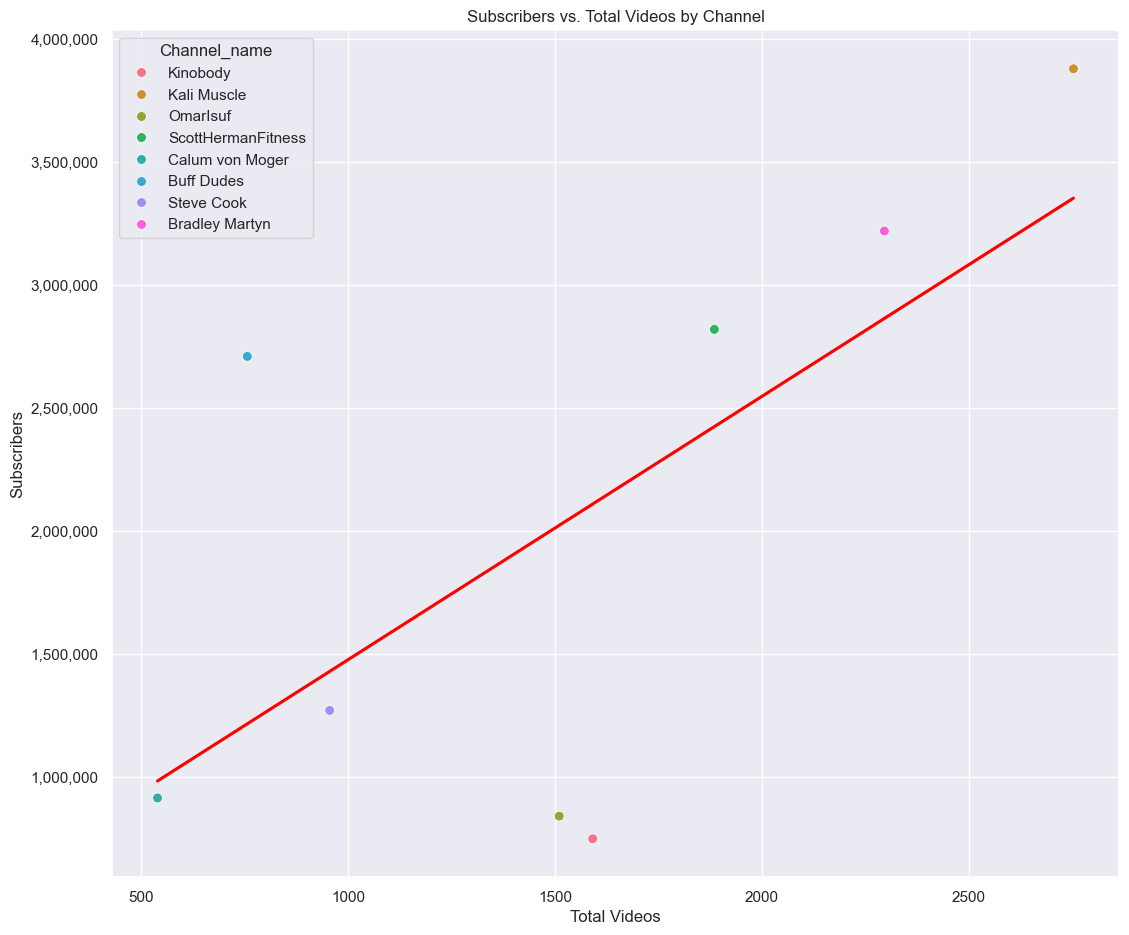

In [123]:
plt.figure(figsize=(13, 11))
sns.scatterplot(
    data=channel_data,
    x="Total_videos", y="Subscribers",
    hue="Channel_name",
    palette="husl",
    s=50  # Size of scatter points
)

sns.regplot(
    data=channel_data,
    x="Total_videos", y="Subscribers",
    scatter=False, 
    color='red',
    ci=None
)

plt.legend(title='Channel_name')

# Customize the plot
plt.title("Subscribers vs. Total Videos by Channel")
plt.xlabel("Total Videos")
plt.ylabel("Subscribers")

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

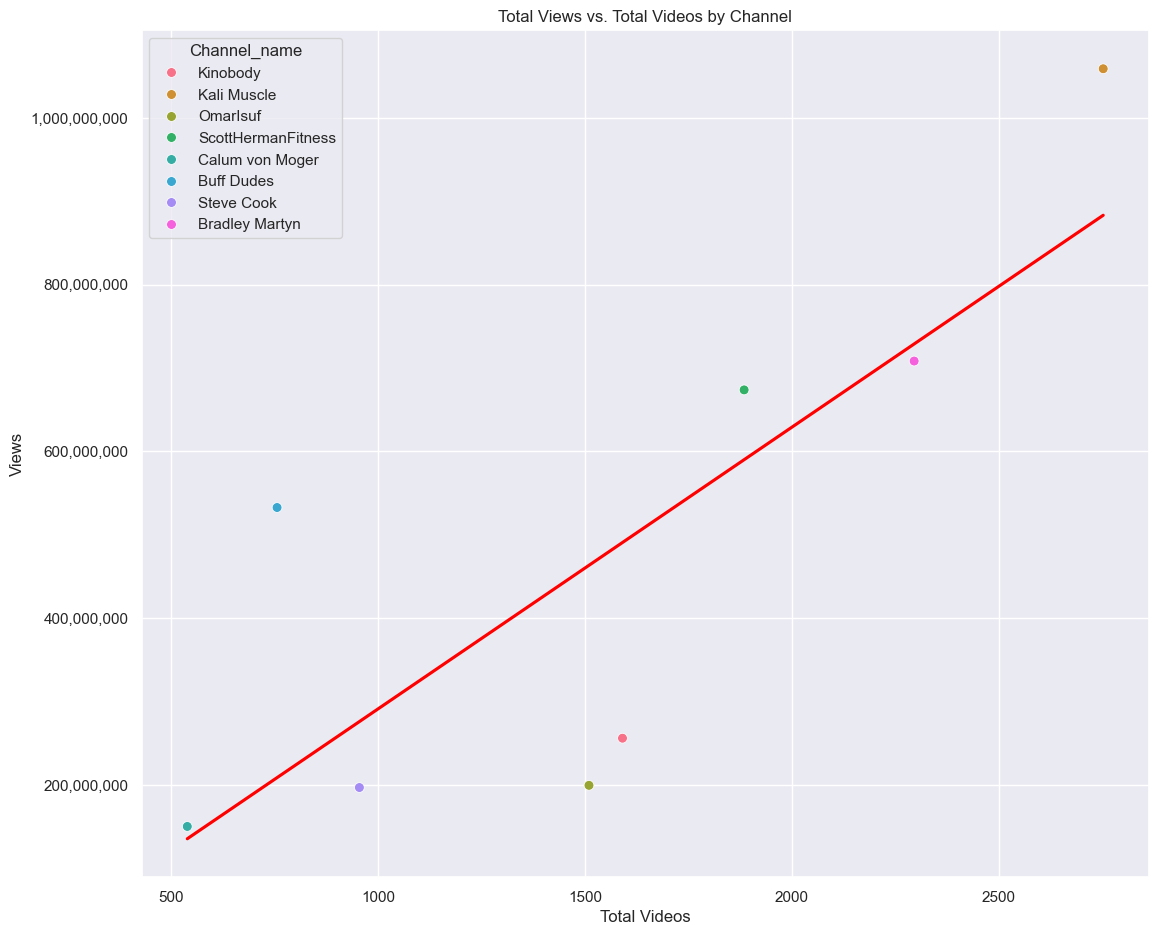

In [126]:
plt.figure(figsize=(13, 11))
sns.set_style("darkgrid")
sns.scatterplot(
    data=channel_data,
    x="Total_videos", y="Views",
    hue="Channel_name",
    palette="husl", 
    s=50
)

sns.regplot(
    data=channel_data,
    x="Total_videos", y="Views",
    scatter=False, 
    color='red',
    ci=None
)

plt.legend(title='Channel_name')

# Customize the plot
plt.title("Total Views vs. Total Videos by Channel")
plt.xlabel("Total Videos")
plt.ylabel("Views")

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

## Function to get video ids

## Function to get video ids

In [73]:
channel_data

,Channel_name,Channel_start_date,Channel_id,Subscribers,Views,Total_videos,playlist_id
4,Kinobody,2006-06-10,UCtBw4N4-EiaAqK9TvZGlGDw,748000,255993437,1591,UUtBw4N4-EiaAqK9TvZGlGDw
1,Kali Muscle,2008-04-10,UCg_tz2iw7_-gf2xIL-DdM2g,3880000,1058977985,2753,UUg_tz2iw7_-gf2xIL-DdM2g
5,OmarIsuf,2009-04-12,UCaHx0T1LWrVKWF1XfWWLSuw,840000,199463046,1510,UUaHx0T1LWrVKWF1XfWWLSuw
2,ScottHermanFitness,2009-05-25,UCEtMRF1ywKMc4sf3EXYyDzw,2820000,673778453,1885,UUEtMRF1ywKMc4sf3EXYyDzw
6,Calum von Moger,2012-04-17,UCYlG9AHZStenkJgXLj6w61A,914000,150143268,539,UUYlG9AHZStenkJgXLj6w61A
3,Buff Dudes,2012-05-08,UCKf0UqBiCQI4Ol0To9V0pKQ,2710000,532693475,756,UUKf0UqBiCQI4Ol0To9V0pKQ
0,Steve Cook,2012-12-13,UC3kbAe8BguiZFnsVYY1oW0w,1270000,196830680,955,UU3kbAe8BguiZFnsVYY1oW0w
7,Bradley Martyn,2014-08-20,UC7aE5B-ZFEAoumyj6FaJ7lg,3220000,708385578,2296,UU7aE5B-ZFEAoumyj6FaJ7lg


In [74]:
def get_playlist_ids(channel_name):
    filtered_df = channel_data.loc[channel_data['Channel_name'] == channel_name, 'playlist_id']
    return filtered_df.tolist()
channels_of_interest = ['Kinobody', 'OmarIsuf','Kali Muscle', 'ScottHermanFitness', 'Calum von Moger', 'Steve Cook', 'Buff Dudes', 'Bradley Martyn']
playlist_ids = []
for channel in channels_of_interest:
    playlist_ids.extend(get_playlist_ids(channel))
print(playlist_ids)

['UUtBw4N4-EiaAqK9TvZGlGDw', 'UUaHx0T1LWrVKWF1XfWWLSuw', 'UUg_tz2iw7_-gf2xIL-DdM2g', 'UUEtMRF1ywKMc4sf3EXYyDzw', 'UUYlG9AHZStenkJgXLj6w61A', 'UU3kbAe8BguiZFnsVYY1oW0w', 'UUKf0UqBiCQI4Ol0To9V0pKQ', 'UU7aE5B-ZFEAoumyj6FaJ7lg']


In [75]:
def get_video_ids(youtube, playlist_ids):
    video_ids = []

    for playlist_id in playlist_ids:
        request = youtube.playlistItems().list(
            part='contentDetails',
            playlistId=playlist_id,
            maxResults=50
        )
        response = request.execute()

        for item in response['items']:
            video_ids.append(item['contentDetails']['videoId'])

        next_page_token = response.get('nextPageToken')
        more_pages = True

        while more_pages:
            if next_page_token is None:
                more_pages = False
            else:
                request = youtube.playlistItems().list(
                    part='contentDetails',
                    playlistId=playlist_id,
                    maxResults=50,
                    pageToken=next_page_token
                )
                response = request.execute()

                for item in response['items']:
                    video_ids.append(item['contentDetails']['videoId'])

                next_page_token = response.get('nextPageToken')

    return video_ids

In [77]:
video_ids = get_video_ids(youtube, playlist_ids)

In [78]:
video_ids

['7JjPQX4BszI',
 '5lP8YiqGSjQ',
 'dyVUPw_5xM4',
 'qimCnXQ9NII',
 '8AbG0O52GQk',
 'qPcqDvunEu8',
 'rpK7wg7jloE',
 'uBwGldhmEz4',
 'LuGaIjpKCUQ',
 'iGQAmjnd4G8',
 'jm1apLjvcNo',
 'h_Iux6tK7AM',
 'NGgtGEpMt5s',
 'J1qR_wufgts',
 'ovUXBCvdv3M',
 'TFii9TJztkI',
 'zl0onLrjg7Y',
 'y5R6jRQBXYg',
 'O8zR6aUZSXU',
 'SZOBvlDHG_M',
 '0EWqlA0u5YA',
 '-LfFB4FC4j4',
 'QFZ46w_ayc4',
 'sBVOEdULYKo',
 '8qoUJ5EyI1U',
 'TFpCESwcZXw',
 'tlWAzhZbBT0',
 'lnlyWHdOqWs',
 'fMKXy6r6fPE',
 'Jqvpmwb9ufw',
 '-4gW-yVIh0o',
 'lp9bxakq_24',
 'pI7oA0BAeBk',
 'w5US6Dxy7IM',
 'JV6NNbzfTjg',
 'Px6AaN3hJxI',
 '0LIwiNQOTuQ',
 'EI-_Djd5cUI',
 'f1-5E84fA5k',
 'TjzMQpuVTng',
 '03dvumtZ6hk',
 'K55V3d6hUgw',
 'iiqV6GvZFuI',
 'K6iEyNrkPF0',
 'eiJqxfhJ3WE',
 'JmqXeY9QWEo',
 '1HHa7KkzL4E',
 'hynMJ8TA7ng',
 'BRWMlcRvlYQ',
 'bGwZwH0LuYY',
 'H7N7uJzSTFM',
 'vDXrx3dR6FI',
 'of_OY7aG-Qw',
 'BnVPqVaaYfk',
 'CYMHPzbl5Bg',
 '6PC0ffJKjrA',
 'SymKAwa5YwY',
 '7CaZevdB2W4',
 'P-qhhSWM7Yc',
 '3D7EzFwWZi0',
 'kSpMyBtp3Js',
 'o4TyGtsr0_Y',
 '8uNg-E

## Function to get video details

In [79]:
def get_video_details(youtube, video_ids):
    all_video_stats = []
    
    for i in range(0, len(video_ids), 50):
        batch_ids = video_ids[i:i+50]
        request = youtube.videos().list(
            part='snippet,statistics',
            id=','.join(batch_ids)
        )
        response = request.execute()

        for video in response.get('items', []):
            video_stats = {
                'Title': video['snippet']['title'],
                'Channel_id': video['snippet']['channelId'],
                'Published_date': video['snippet']['publishedAt'],
                'Views': video['statistics'].get('viewCount', 0),
                'Likes': video['statistics'].get('likeCount', 0),
                'Comments': video['statistics'].get('commentCount', 0)
            }
            all_video_stats.append(video_stats)
        
    return all_video_stats

In [80]:
video_details = get_video_details(youtube, video_ids)

In [81]:
video_data = video_data.drop_duplicates()
video_data = pd.DataFrame(video_details)

In [82]:
video_data

,Title,Channel_id,Published_date,Views,Likes,Comments
0,Do you know what a beast is?,UCtBw4N4-EiaAqK9TvZGlGDw,2024-08-07T01:30:03Z,10507,431,20
1,Getting your girlfriend back: Toxic Edition 😈,UCtBw4N4-EiaAqK9TvZGlGDw,2024-08-06T23:00:03Z,4126,255,25
2,"The best pick up line? You don't need one, it’...",UCtBw4N4-EiaAqK9TvZGlGDw,2024-08-06T02:26:44Z,8140,401,15
3,This Fitness Test is the Strongest Predictor o...,UCtBw4N4-EiaAqK9TvZGlGDw,2024-08-05T16:05:24Z,12525,457,102
4,Wondering if she's into you? Here are 4 obviou...,UCtBw4N4-EiaAqK9TvZGlGDw,2024-08-05T00:30:05Z,5603,272,5
...,...,...,...,...,...,...
12259,Bradley Martyn - Beginner Leg Routine,UC7aE5B-ZFEAoumyj6FaJ7lg,2014-09-12T19:18:05Z,100362,3517,269
12260,Bradley martyn - Beginner Routines Explained,UC7aE5B-ZFEAoumyj6FaJ7lg,2014-09-10T23:05:30Z,85244,4238,324
12261,Bradley Martyn - Beginner Chest Routine,UC7aE5B-ZFEAoumyj6FaJ7lg,2014-09-08T19:31:18Z,162454,7672,737
12262,Bradley Martyn - Here we GO!,UC7aE5B-ZFEAoumyj6FaJ7lg,2014-09-07T23:51:17Z,160943,6003,344


In [83]:
videochanneldata = pd.merge(video_data, channel_data, on='Channel_id', how='inner')
videochanneldata = videochanneldata.rename(columns={'Views_x': 'Views'})
videochanneldata = videochanneldata[['Views', 'Likes', 'Comments', 'Channel_name']]
videochanneldata

,Views,Likes,Comments,Channel_name
0,10507,431,20,Kinobody
1,4126,255,25,Kinobody
2,8140,401,15,Kinobody
3,12525,457,102,Kinobody
4,5603,272,5,Kinobody
...,...,...,...,...
12259,100362,3517,269,Bradley Martyn
12260,85244,4238,324,Bradley Martyn
12261,162454,7672,737,Bradley Martyn
12262,160943,6003,344,Bradley Martyn


In [84]:
videochanneldata['Views'] = pd.to_numeric(video_data['Views'])
videochanneldata['Likes'] = pd.to_numeric(video_data['Likes'])
videochanneldata['Comments'] = pd.to_numeric(video_data['Comments'])
videochanneldata

,Views,Likes,Comments,Channel_name
0,10507,431,20,Kinobody
1,4126,255,25,Kinobody
2,8140,401,15,Kinobody
3,12525,457,102,Kinobody
4,5603,272,5,Kinobody
...,...,...,...,...
12259,100362,3517,269,Bradley Martyn
12260,85244,4238,324,Bradley Martyn
12261,162454,7672,737,Bradley Martyn
12262,160943,6003,344,Bradley Martyn


In [85]:
average_stats = videochanneldata.groupby('Channel_name').agg({
    'Views': 'mean',
    'Likes': 'mean',
    'Comments': 'mean'
})

pd.set_option('display.float_format', '{:,.2f}'.format)

average_stats = average_stats.sort_values("Views", ascending = False).reset_index()

print(average_stats)

         Channel_name      Views     Likes  Comments
0          Buff Dudes 728,707.17 14,609.57    677.92
1         Kali Muscle 384,552.41  9,896.48    482.85
2  ScottHermanFitness 357,281.49  4,358.32    356.54
3      Bradley Martyn 308,287.92  8,777.61    468.60
4     Calum von Moger 278,565.63  5,037.64    451.08
5          Steve Cook 205,899.69  3,732.08    289.07
6            Kinobody 160,818.22  5,599.14    203.01
7            OmarIsuf 132,008.88  4,229.33    377.43


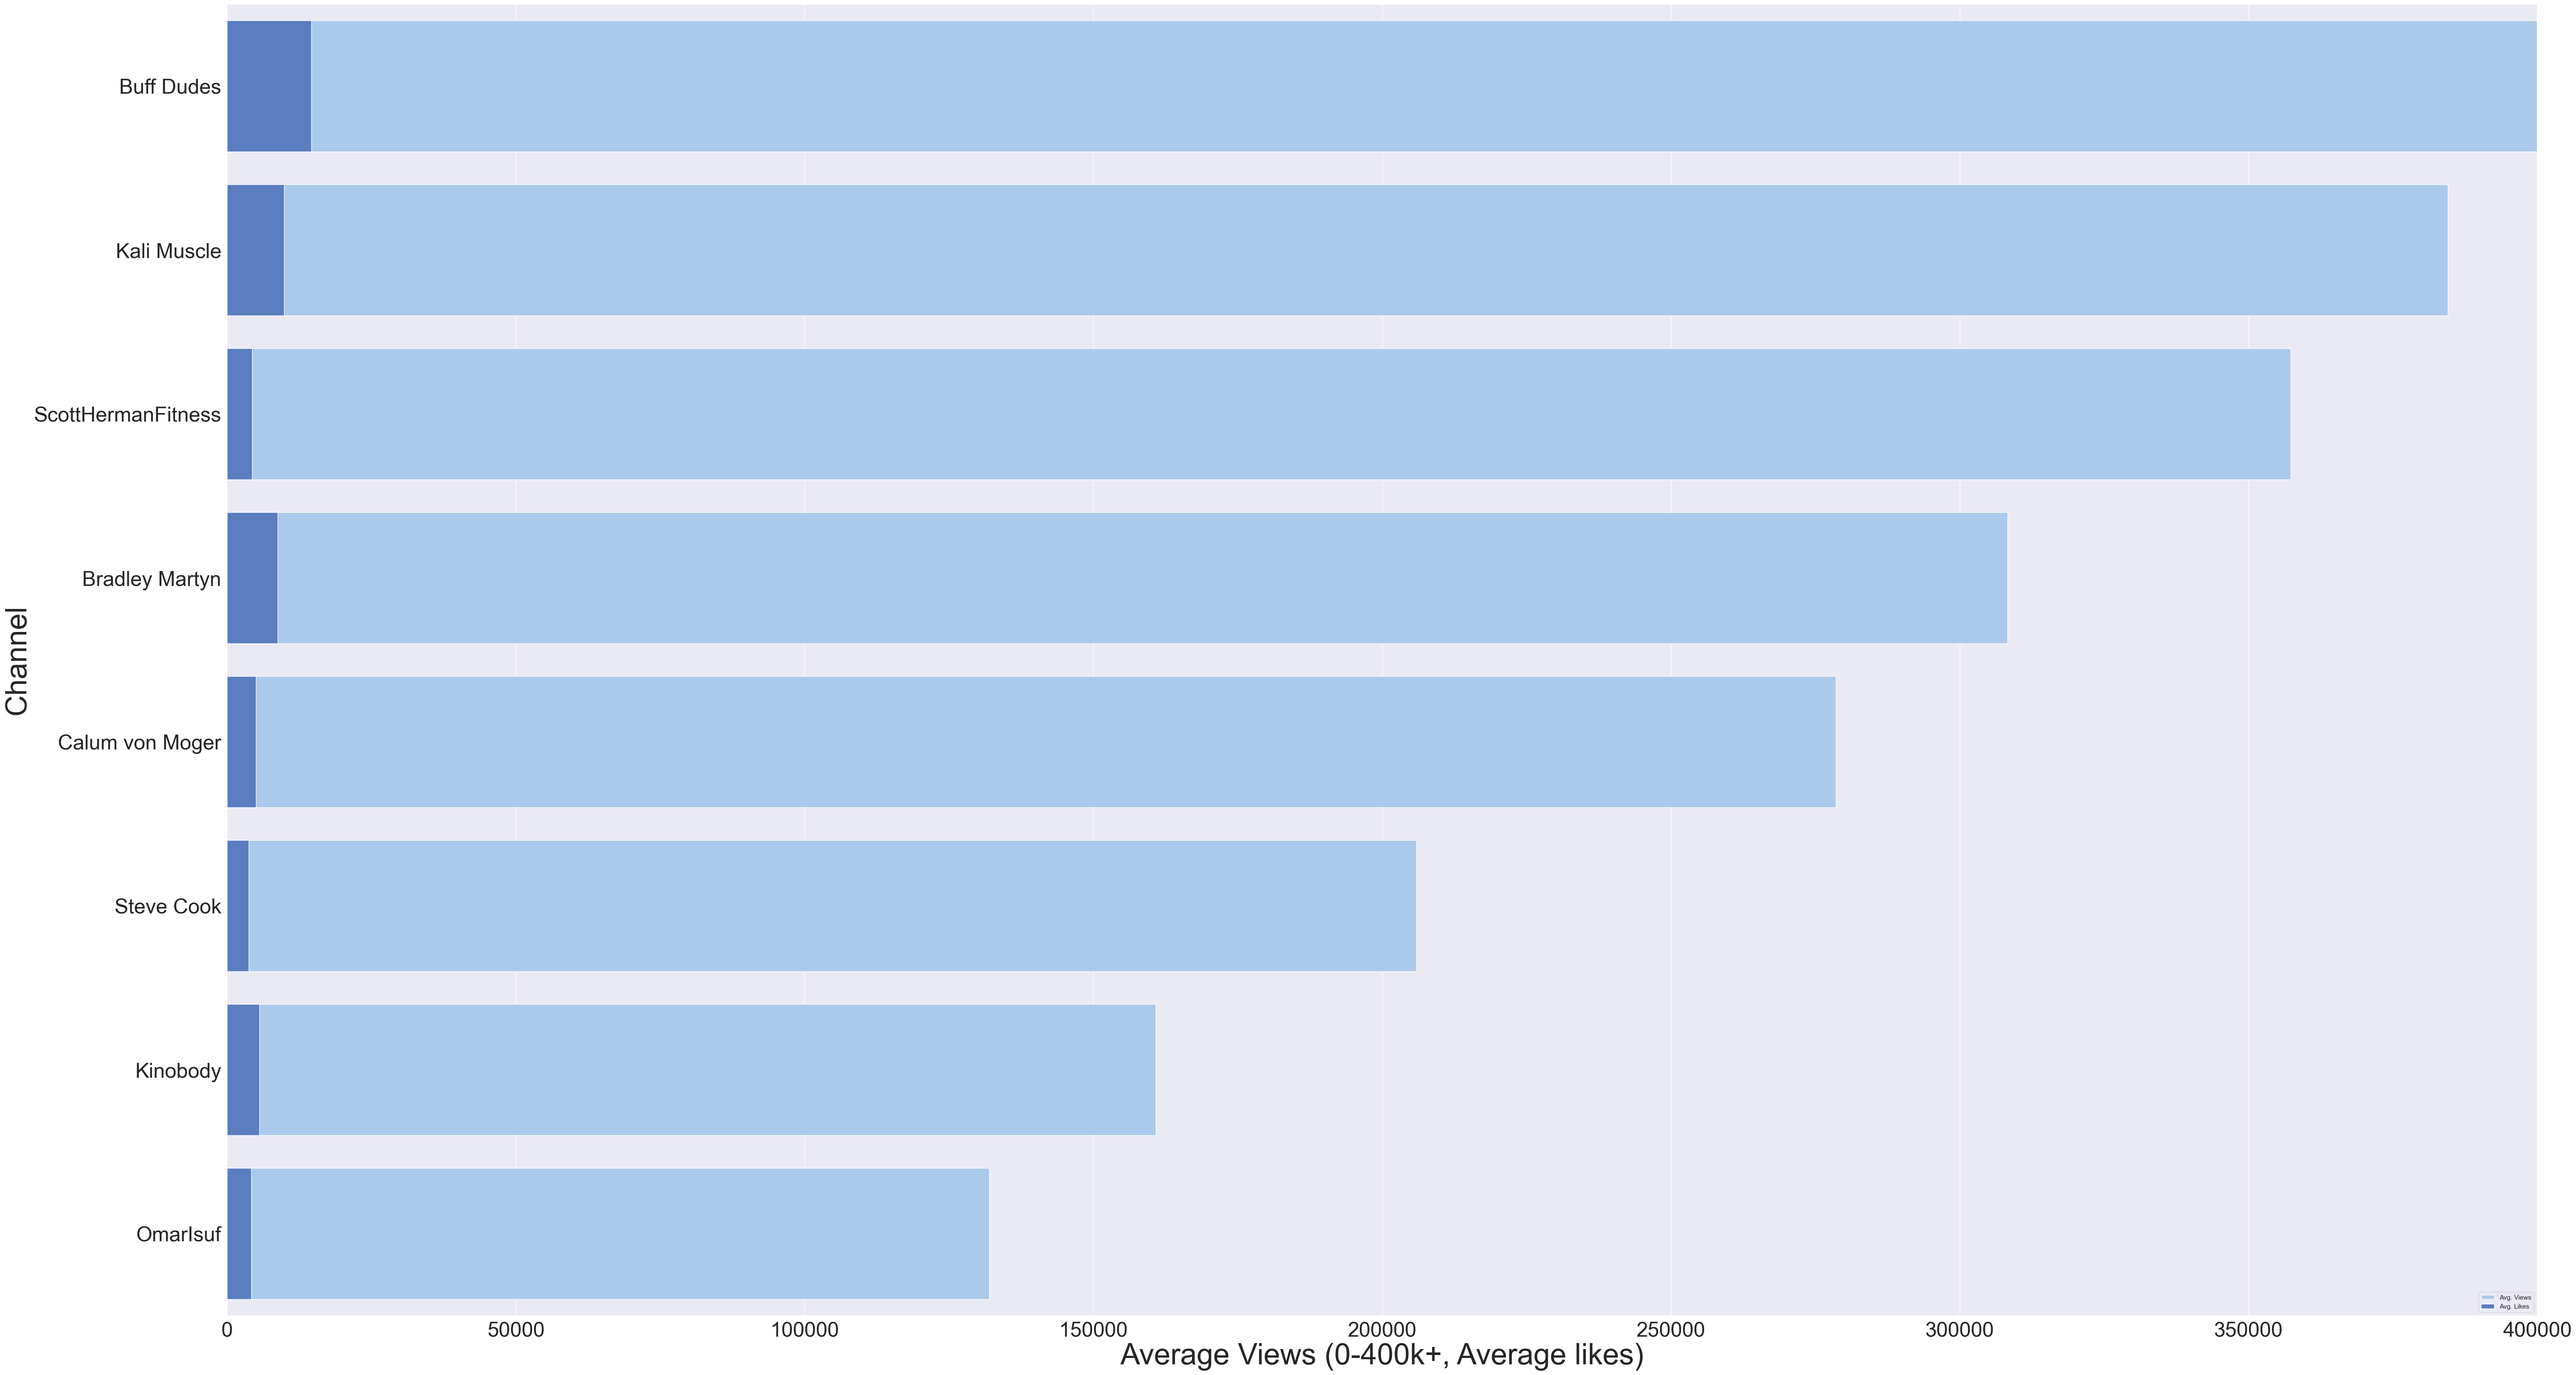

In [128]:
f, ax = plt.subplots(figsize=(70, 40))
sns.set_color_codes("pastel")
sns.barplot(x="Views", y="Channel_name", data=average_stats,
            label="Avg. Views", color="b")
sns.set_color_codes("muted")
sns.barplot(x="Likes", y="Channel_name", data=average_stats,
            label="Avg. Likes", color="b")
ax.set_xlim(0, 400000)
ax.set_xlabel('Average Views (0-400k+, Average likes)', fontsize=50)
ax.set_ylabel('Channel', fontsize=50)
ax.tick_params(axis='both', which='major', labelsize=35)

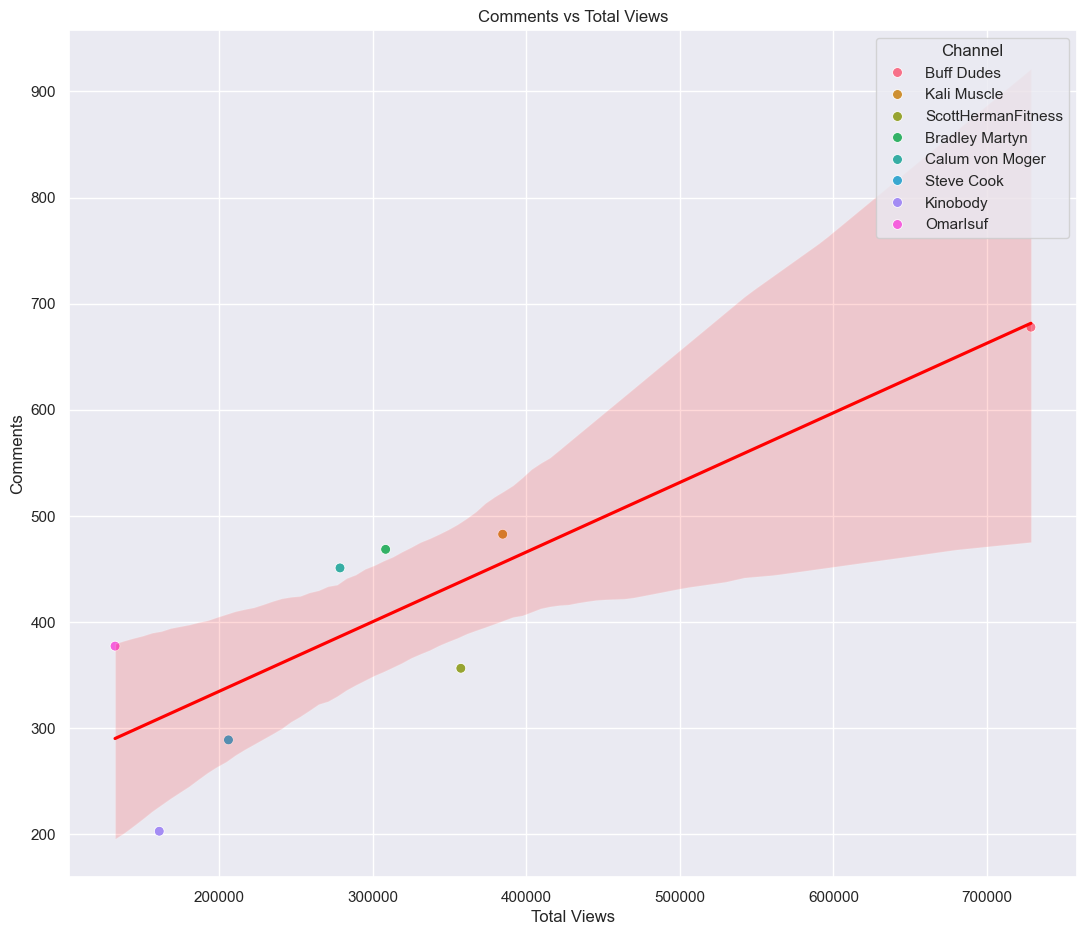

In [109]:
plt.figure(figsize=(13, 11))
sns.set_style("darkgrid")
sns.scatterplot(
    data=average_stats,
    x="Views", y="Comments",
    hue="Channel_name",
    palette="husl",
    s=50 
)

sns.regplot(
    data=average_stats,
    x="Views", y="Comments",
    scatter=False,
    color='red',
    #ci=None
)

plt.legend(title='Channel')

# plot customization
plt.title("Comments vs Total Views")
plt.xlabel("Total Views")
plt.ylabel("Comments")

plt.show()

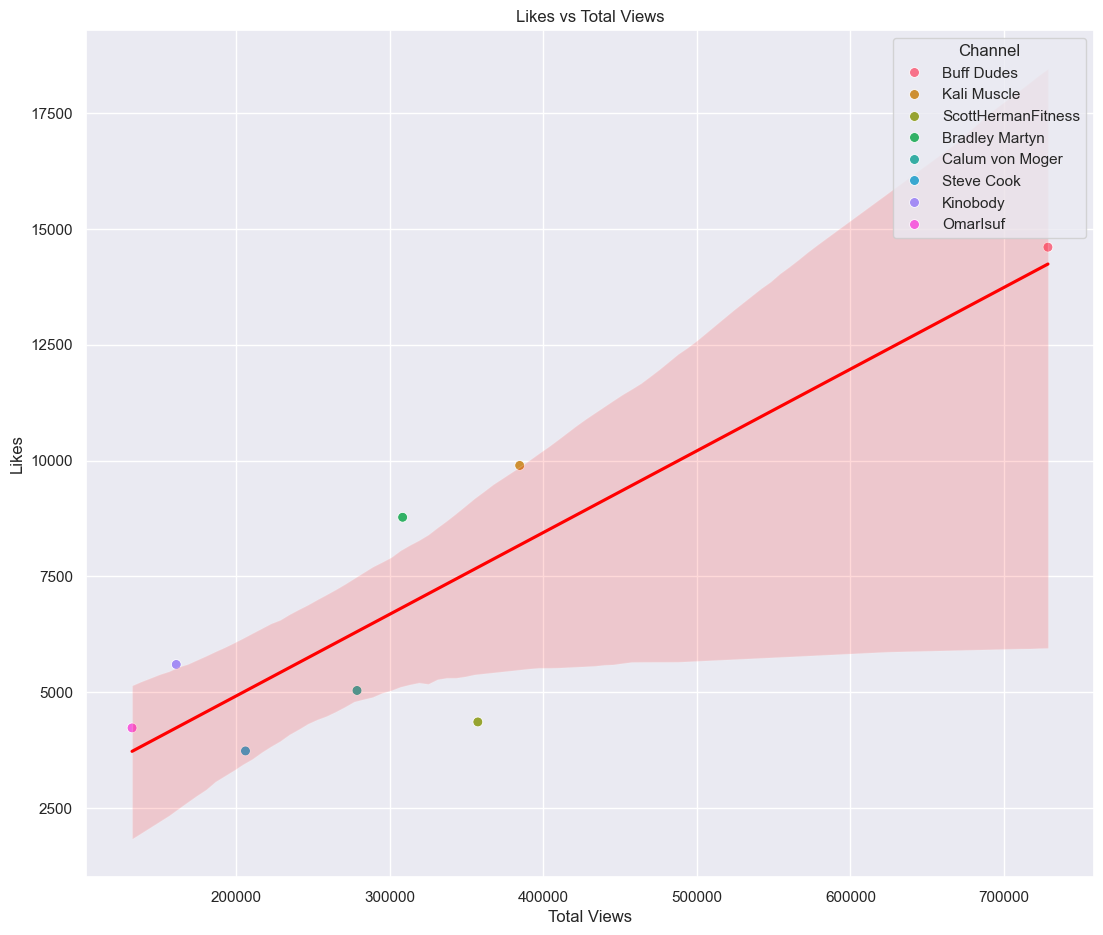

In [110]:
plt.figure(figsize=(13, 11))
sns.set_style("darkgrid")
sns.scatterplot(
    data=average_stats,
    x="Views", y="Likes",
    hue="Channel_name", 
    palette="husl", 
    s=50
)

sns.regplot(
    data=average_stats,
    x="Views", y="Likes",
    scatter=False,
    color='red',
    #ci=None
)

plt.legend(title='Channel')


plt.title("Likes vs Total Views")
plt.xlabel("Total Views")
plt.ylabel("Likes")

plt.show()